<a href="https://colab.research.google.com/drive/181I_G8QSQpScqikImjKlqrBFl5Kl-kN-" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts C-E: Stochastic Gradient Descent Visualization

In this Jupyter notebook, we visualize how SGD works. This visualization corresponds to parts C-E of question 3 in set 1.

Use this notebook to write your code for problem 3 parts C-E by filling in the sections marked `# TODO` and running all cells.

In [ ]:
# Install a package
!apt-get update
!apt install imagemagick

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [645 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,340 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu

In [ ]:
url_dict = {
    'sgd_helper.py': 'https://drive.usercontent.google.com/download?id=1CEkeR93mahEfymBZipy2bXDuKXmRXrBK&export=download&authuser=0&confirm=t&uuid=15ec85c6-9562-42de-a66f-691267f758bf&at=APZUnTWUf9359J6CxXbDspbyj5Wk:1704950567800',
    'sgd_multiopt_helper.py' :'https://drive.usercontent.google.com/download?id=1SHcoNfqhx67Vxwh9Ez7q2Zx9FWJ1mNZw&export=download&authuser=0&confirm=t&uuid=25b69360-3d79-4546-b7b0-10613a99ae72&at=APZUnTX954mjrD_2SuC5H8ThQ63E:1704950628117',
}

import requests

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [ ]:
download_file('sgd_helper.py')

Start downloading...
Complete


In [ ]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, Image
from matplotlib import animation, rc

from sgd_helper import (
    generate_dataset1,
    generate_dataset2,
    plot_dataset,
    plot_loss_function,
    animate_convergence,
    animate_sgd_suite
)

## Problem 3C: Implementation of SGD

Fill in the loss, gradient, and SGD functions according to the guidelines given in the problem statement in order to perform SGD.

In [ ]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    loss = np.sum((Y - np.dot(X, w)) ** 2)
    return loss

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to w.
    '''

    dw = -2 * (y - np.dot(w, x)) * x
    return dw

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    W = []
    losses = []
    w = w_start
    for i in range(N_epochs):
      random_indices = np.random.permutation(len(X))
      X = X[random_indices]
      Y = Y[random_indices]
      for i in range(len(X)):
        w -= eta * gradient(X[i], Y[i], w)
      losses.append(loss(X, Y, w))
      # Add a copy of w because np arrays have object references (not primitive types)
      W.append(np.copy(w))
    return W, losses



## Problem 3D: Visualization

### Dataset

We'll start off by generating two simple 2-dimensional datasets. For simplicity we do not consider separate training and test sets.

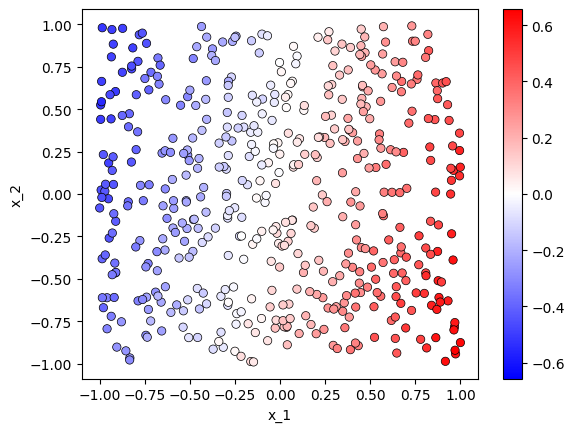

In [ ]:
X1, Y1 = generate_dataset1()
plot_dataset(X1, Y1)

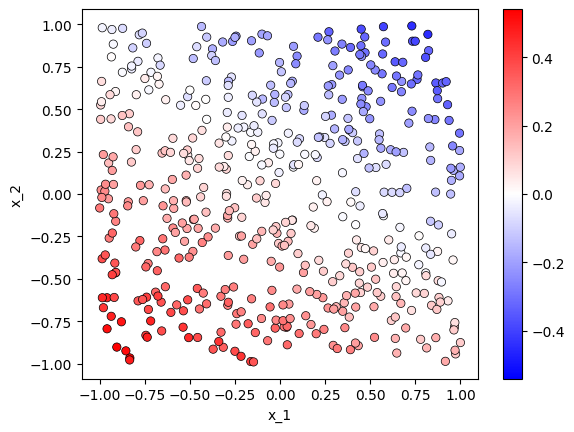

In [ ]:
X2, Y2 = generate_dataset2()
plot_dataset(X2, Y2)

### SGD from a single point

First, let's visualize SGD from a single starting point:

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1e-05} ...

Animating...


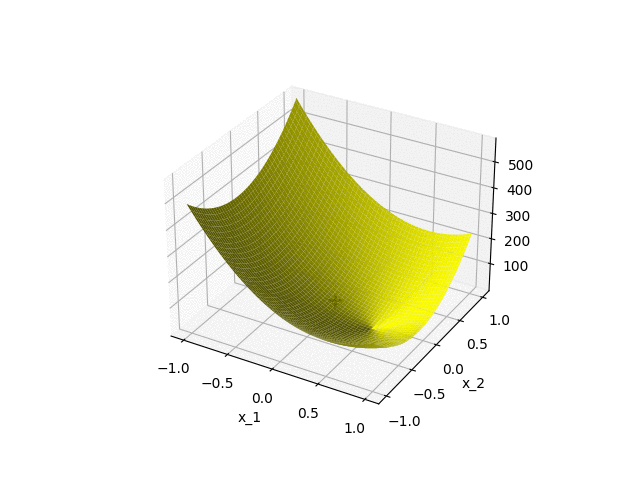

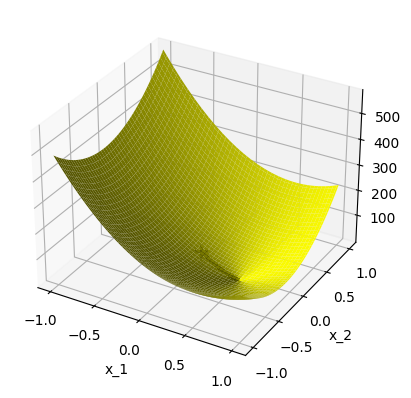

In [ ]:
# Parameters to feed the SGD.
# <FR> changes the animation speed.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's animate it!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save('animation1.gif', fps=30, writer='imagemagick')
Image(open('animation1.gif','rb').read())

Let's view how the weights change as the algorithm converges:


Animating...


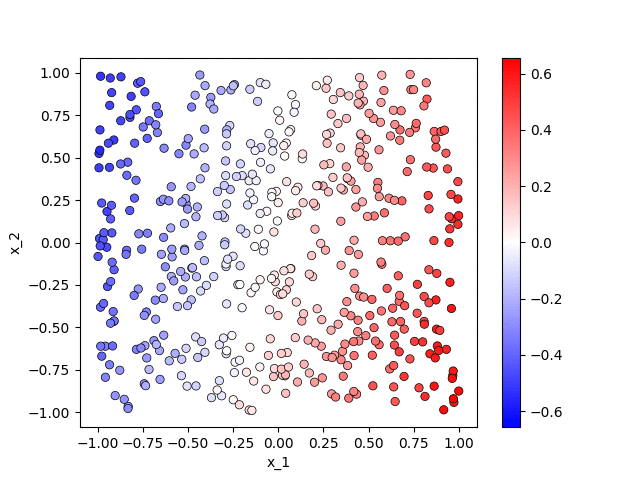

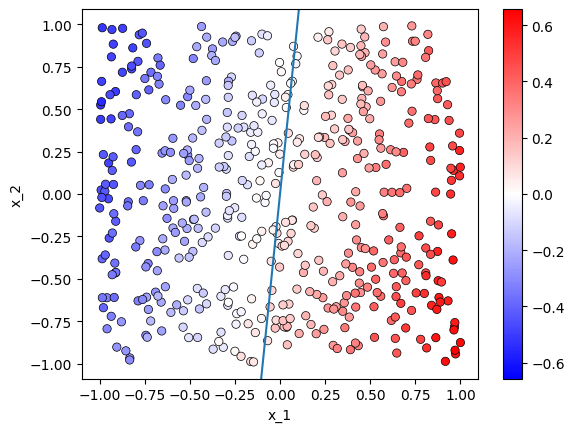

In [ ]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 0.00001},)
N_epochs = 1000
FR = 20

# Let's do it!
W, _ = SGD(X1, Y1, params[0]['w_start'], params[0]['eta'], N_epochs)
anim = animate_convergence(X1, Y1, W, FR)
anim.save('animation2.gif', fps=30, writer='imagemagick')
Image(open('animation2.gif','rb').read())

### SGD from multiple points

Now, let's visualize SGD from multiple arbitrary starting points:

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...

Animating...


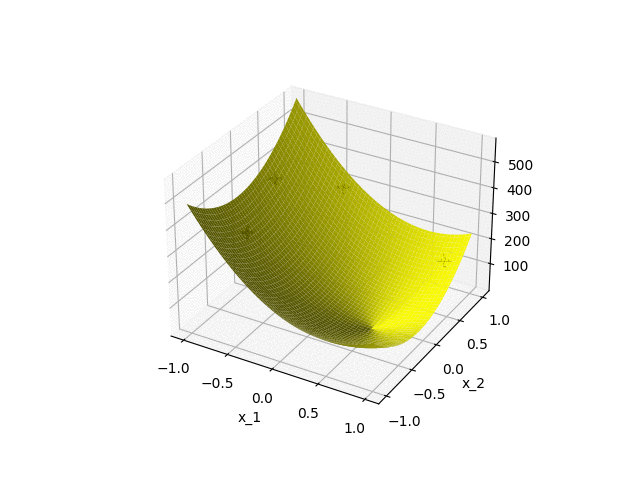

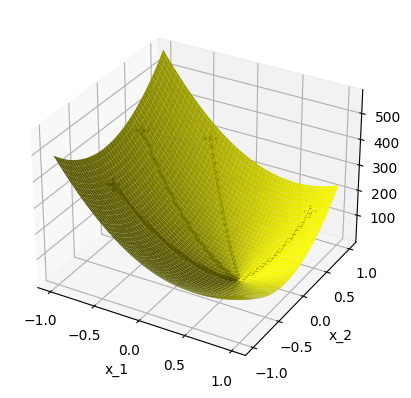

In [ ]:
# Parameters to feed the SGD.
# Here, we specify each different set of initializations as a dictionary.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Let's go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save('animation3.gif', fps=30, writer='imagemagick')
Image(open('animation3.gif','rb').read())

Let's do the same thing but with a different dataset:

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...

Animating...


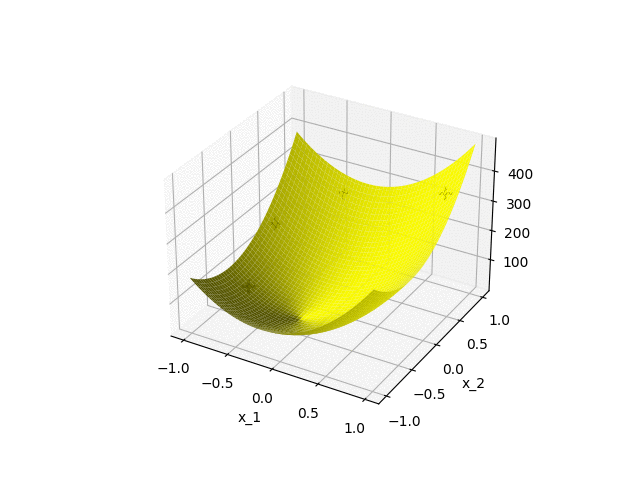

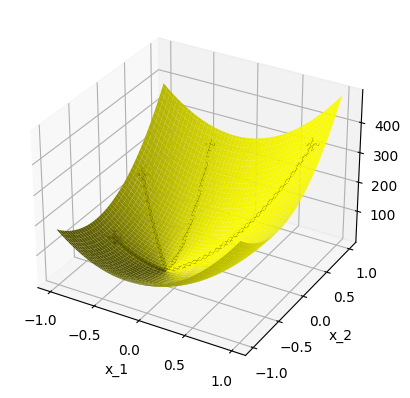

In [ ]:
# Parameters to feed the SGD.
params = (
    {'w_start': [-0.8, -0.3], 'eta': 0.00001},
    {'w_start': [-0.9, 0.4], 'eta': 0.00001},
    {'w_start': [-0.4, 0.9], 'eta': 0.00001},
    {'w_start': [0.8, 0.8], 'eta': 0.00001},
)
N_epochs = 1000
FR = 20

# Animate!
anim = animate_sgd_suite(SGD, loss, X2, Y2, params, N_epochs, FR)
anim.save('animation4.gif', fps=30, writer='imagemagick')
Image(open('animation4.gif','rb').read())

## Problem 3E: SGD with different step sizes

Now, let's visualize SGD with different step sizes (eta):

(For ease of visualization: the trajectories are ordered from left to right by decreasing eta value. Also, note that we use smaller values of N_epochs and FR here for easier visualization.)

Performing SGD with parameters {'w_start': [0.7, 0.8], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.2, 0.8], 'eta': 5e-05} ...
Performing SGD with parameters {'w_start': [-0.2, 0.7], 'eta': 0.0001} ...
Performing SGD with parameters {'w_start': [-0.6, 0.6], 'eta': 0.0002} ...

Animating...


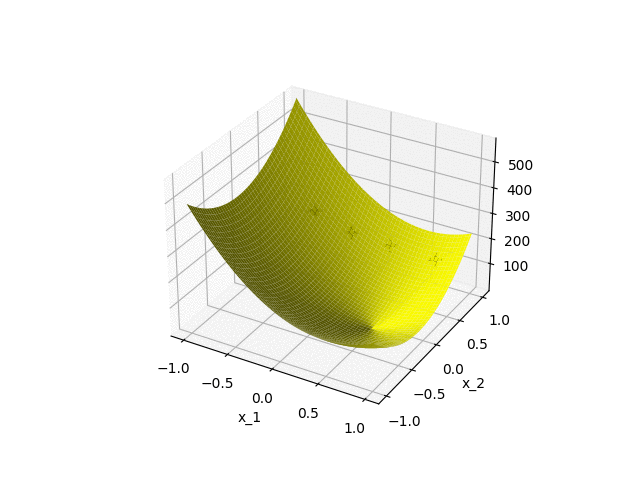

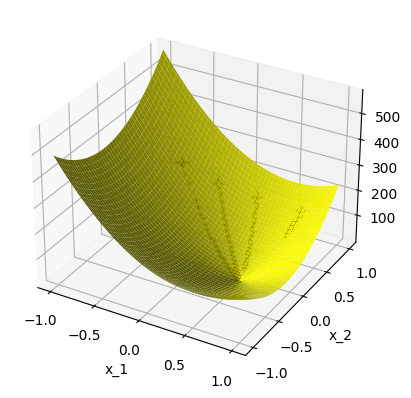

In [ ]:
# Parameters to feed the SGD.
params = (
    {'w_start': [0.7, 0.8], 'eta': 0.00001},
    { 'w_start': [0.2, 0.8], 'eta': 0.00005},
    {'w_start': [-0.2, 0.7], 'eta': 0.0001},
    {'w_start': [-0.6, 0.6], 'eta': 0.0002},
)
N_epochs = 100
FR = 2

# Go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save('animation5.gif', fps=30, writer='imagemagick')
Image(open('animation5.gif','rb').read())

### Plotting SGD Convergence

Let's visualize the difference in convergence rates a different way. Plot the loss with respect to epoch (iteration) number for each value of eta on the same graph.

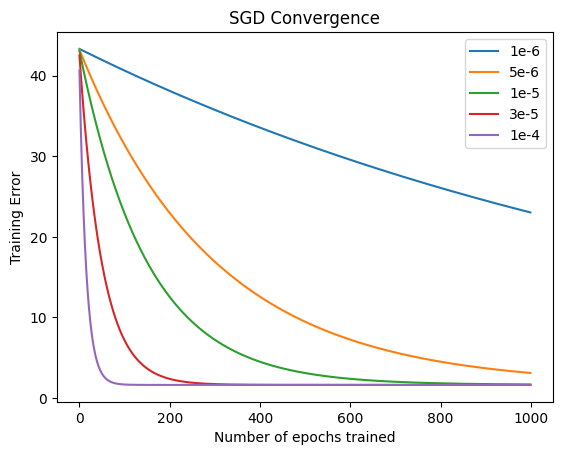

In [ ]:
'''Plotting SGD convergence'''

eta_vals = [1e-6, 5e-6, 1e-5, 3e-5, 1e-4]
w_start = [0.01, 0.01]
N_epochs = 1000

plt.figure()
for eta in eta_vals:
  W, losses = SGD(X1, Y1, w_start, eta, N_epochs)
  plt.plot(range(N_epochs), losses)
  plt.legend(["1e-6", "5e-6", "1e-5", "3e-5", "1e-4"])
  plt.xlabel("Number of epochs trained")
  plt.ylabel("Training Error")
  plt.title("SGD Convergence")

plt.show()

Clearly, a big step size results in fast convergence! Why don't we just set eta to a really big value, then? Say, eta=1?

(Again, note that the FR is lower for this animation.)

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1} ...

Animating...


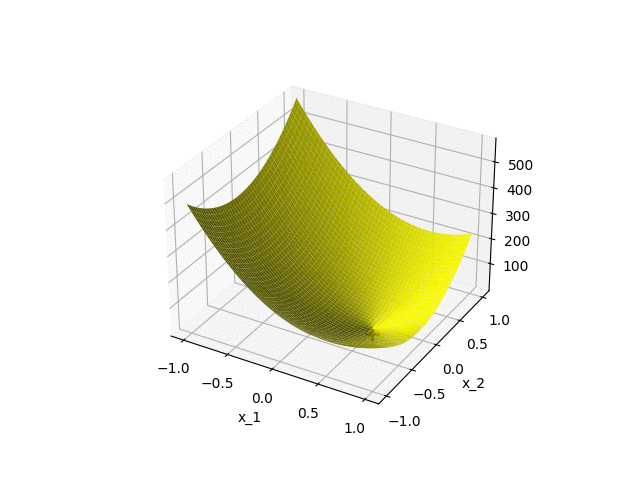

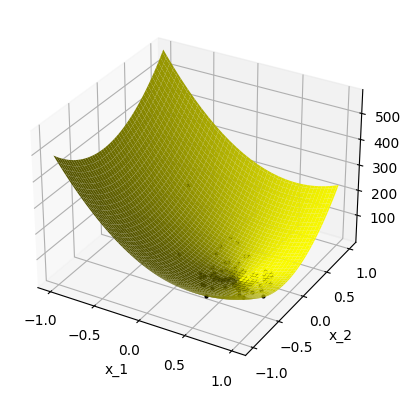

In [ ]:
# Parameters to feed the SGD.
params = ({'w_start': [0.01, 0.01], 'eta': 1},)
N_epochs = 100
FR = 2

# Voila!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save('animation6.gif', fps=30, writer='imagemagick')
Image(open('animation6.gif','rb').read())

Just for fun, let's try eta=10 as well. What happens? (Hint: look at W)

In [ ]:
# Parameters to feed the SGD.
w_start = [0.01, 0.01]
eta = 10
N_epochs = 100

# Presto!
W, losses = SGD(X1, Y1, w_start, eta, N_epochs)

<ipython-input-19-5ee99b6ec12b>:31: RuntimeWarning: overflow encountered in double_scalars
  dw = -2 * (y - np.dot(w, x)) * x


## Extra Visualization (not part of the homework problem)

One final visualization! What happens if the loss function has multiple optima?

In [ ]:
download_file('sgd_multiopt_helper.py')

Start downloading...
Complete


Performing SGD with parameters {'w_start': [0.9, 0.9], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [0.0, 0.0], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [-0.8, 0.6], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [-0.8, -0.6], 'eta': 0.01} ...
Performing SGD with parameters {'w_start': [-0.4, -0.3], 'eta': 0.01} ...

Animating...


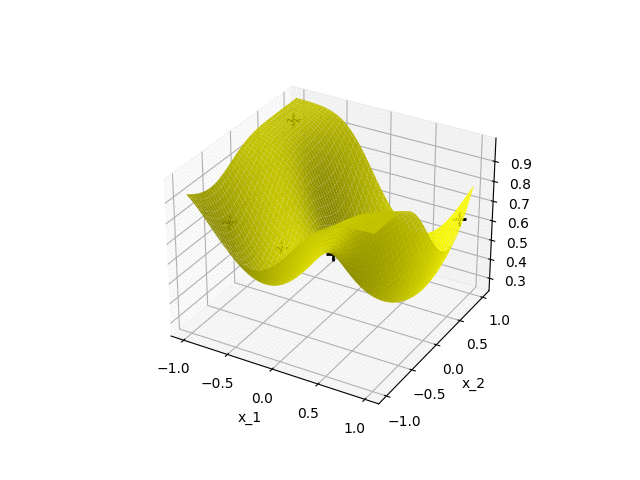

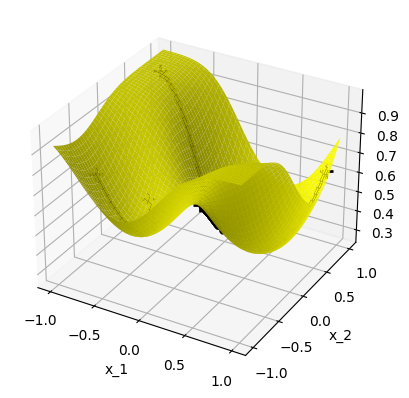

In [ ]:
# Import different SGD & loss functions.
# In particular, the loss function has multiple optima.
from sgd_multiopt_helper import SGD, loss

# Parameters to feed the SGD.
params = (
    {'w_start': [0.9, 0.9], 'eta': 0.01},
    { 'w_start': [0.0, 0.0], 'eta': 0.01},
    {'w_start': [-0.8, 0.6], 'eta': 0.01},
    {'w_start': [-0.8, -0.6], 'eta': 0.01},
    {'w_start': [-0.4, -0.3], 'eta': 0.01},
)
N_epochs = 100
FR = 2

# One more time!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save('animation7.gif', fps=30, writer='imagemagick')
Image(open('animation7.gif','rb').read())